<a href="https://colab.research.google.com/github/andrewhylee/Machine-Learning/blob/master/Predicting_Survived_Members_of_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This notebook will predict which persons boarded the titanic and survived.

In [ ]:
# Set up all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load in Titanic data
titanic = sns.load_dataset('titanic')
(titanic.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Shape (counting the number of rows and columns) of the dataset
print(titanic.shape, "\n", titanic.describe())

(891, 15) 
          survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [ ]:
# Get Some statistics about the data
# Non-numerical values - can't really get Stats | Numeric values - can get Stats
# Will show only numeric values

titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Get information about each column's types and counts of null values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
# Get a count of numer of survivors
# value_counts can be used to know the counts each type of values in that column
titanic['survived'].value_counts()
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


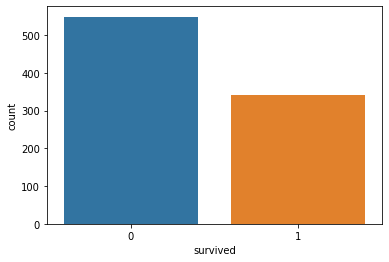

In [ ]:
# Visulaize count of survivors
sns.countplot( titanic.survived )

0   0   0
0   1   1
0   2   2
1   0   2
1   1   3
1   2   4


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

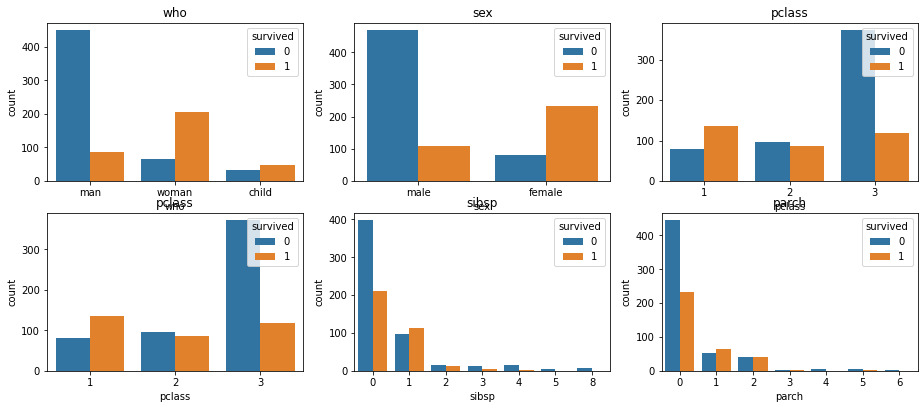

In [ ]:
# Visualizer of the count of survivors for columns 'who','sex','pclass','sibsp','parch','embarked'

cols = ['who','sex','pclass','sibsp','parch','embarked']

row_count = 2
col_count = 3

# The subplot grid and figure size of each graph
fig, axis = plt.subplots( row_count, col_count, figsize = (col_count * 5.2, row_count * 3.2) )

for r in range(0, row_count):
  for c in range(0, col_count):
    i = r*row_count + c # index to go thorough the number of columns
    print(r, ' ', c, ' ', i)
    ax = axis[r][c]
    sns.countplot(titanic[cols[i]], hue=titanic['survived'], ax=ax)
    ax.set_title(cols[i])
    ax.legend(title='survived', loc='upper right')

In [ ]:
# Look at survival rate by sex
titanic.groupby('sex')['survived'].mean()
titanic.groupby('sex')['survived'].head()

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: survived, dtype: int64

In [ ]:
# Look at survival rate by sex and class
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


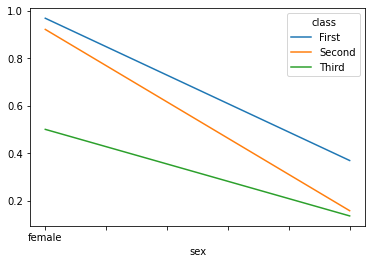

In [ ]:
# Look at survival rate by sex and class visually
titanic.pivot_table('survived', index='sex', columns='class').plot()

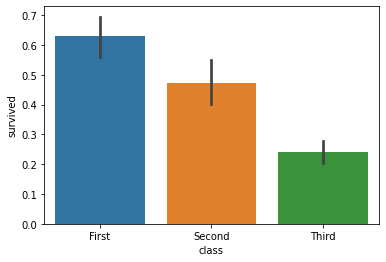

In [ ]:
# Plot the survival rate of each class
sns.barplot(x='class', y='survived', data=titanic)

In [ ]:
# Look at survival rate by sex, age and class
age = pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

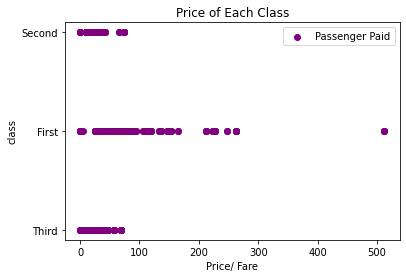

In [ ]:
# Plot the prices paid of each class
plt.scatter(titanic['fare'], titanic['class'], color='purple', label='Passenger Paid' )
plt.ylabel('class')
plt.xlabel('Price/ Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [ ]:
# Count the empty values in each column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
#Look at all of the values in each column & get a count
for val in titanic:
  print(titanic[val].value_counts())
  print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [ ]:
# Drop the columns
titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'alone', 'adult_male'], axis = 1, inplace=True)

In [ ]:
#Drop NA values from certain columns

titanic = titanic.dropna(subset = ['embarked', 'age'])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Print unique values in each columns (before dropna)

print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [ ]:
# Print unique values in each columns (after dropna)

print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode the sex column
titanic.iloc[:, 2 ] = labelencoder.fit_transform ( titanic.iloc[:, 2].values )

titanic.iloc[:, 7 ] = labelencoder.fit_transform ( titanic.iloc[:, 7].values )

In [ ]:
# Print unique values in each columns (after encoding transformation)

print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [ ]:
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [ ]:
# Split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:, 0].values
# X is a list of lists. 
# Y is a list.

In [ ]:
#Split the dataset into 80% training and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0) 

In [ ]:
X_train,X_test

(array([[  1.    ,   1.    ,  31.    , ...,   0.    ,  50.4958,   2.    ],
        [  1.    ,   1.    ,  38.    , ...,   1.    , 153.4625,   2.    ],
        [  2.    ,   1.    ,  35.    , ...,   0.    ,  26.    ,   2.    ],
        ...,
        [  2.    ,   1.    ,  16.    , ...,   0.    ,  26.    ,   2.    ],
        [  2.    ,   1.    ,  39.    , ...,   0.    ,  26.    ,   2.    ],
        [  3.    ,   0.    ,  24.    , ...,   3.    ,  19.2583,   0.    ]]),
 array([[  3.    ,   0.    ,  28.    , ...,   1.    ,  14.4   ,   2.    ],
        [  2.    ,   1.    ,  30.    , ...,   0.    ,  13.    ,   2.    ],
        [  1.    ,   1.    ,   0.92  , ...,   2.    , 151.55  ,   2.    ],
        ...,
        [  1.    ,   1.    ,  54.    , ...,   1.    ,  77.2875,   2.    ],
        [  3.    ,   1.    ,  38.    , ...,   0.    ,   8.6625,   2.    ],
        [  2.    ,   0.    ,  24.    , ...,   2.    ,  65.    ,   2.    ]]))

In [ ]:
#Scale the Data - Makes it easier and faster for our models to train on the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train,X_test

(array([[-1.49280291,  0.7475989 ,  0.11755613, ..., -0.50386115,
          0.26128855,  0.53057164],
        [-1.49280291,  0.7475989 ,  0.60758867, ...,  0.62486718,
          2.10276281,  0.53057164],
        [-0.30316025,  0.7475989 ,  0.39757473, ..., -0.50386115,
         -0.17679857,  0.53057164],
        ...,
        [-0.30316025,  0.7475989 , -0.93251358, ..., -0.50386115,
         -0.17679857,  0.53057164],
        [-0.30316025,  0.7475989 ,  0.67759332, ..., -0.50386115,
         -0.17679857,  0.53057164],
        [ 0.8864824 , -1.33761567, -0.3724764 , ...,  2.88232383,
         -0.2973683 , -1.99574857]]),
 array([[ 1.00238266, -1.26491106, -0.19243638, ...,  0.87950847,
         -0.39061137,  0.47566091],
        [-0.2227517 ,  0.79056942, -0.06066535, ..., -0.53363436,
         -0.42726171,  0.47566091],
        [-1.44788606,  0.79056942, -1.97661607, ...,  2.2926513 ,
          3.19981375,  0.47566091],
        ...,
        [-1.44788606,  0.79056942,  1.52058696, ...,  

In [ ]:
# Create a function with many machine learning models 
def models(X_train, Y_train):

  #Use Logistic regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #Use KNeighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
  knn.fit(X_train, Y_train)

  #Use SVC (Linear kernal)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel='linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Use SVC (RBF kernal)
  #from sklearn.svm import SVC
  svc_rbf = SVC(kernel='rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Use GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Use Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Use the RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
  forest.fit(X_train, Y_train)

  #Print the training accuracy for each model
  print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
  print('[1]K Neighbors Regression Training Accuracy: ', knn.score(X_train, Y_train))
  print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
  print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive-Bayes Training Accuracy: ', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
  print('[6]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [ ]:
#Get and train all the models
all_models = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  0.7978910369068541
[1]K Neighbors Regression Training Accuracy:  0.8664323374340949
[2]SVC Linear Training Accuracy:  0.7768014059753954
[3]SVC RBF Training Accuracy:  0.8506151142355008
[4]Gaussian Naive-Bayes Training Accuracy:  0.8031634446397188
[5]Decision Tree Training Accuracy:  0.9929701230228472
[6]Random Forest Training Accuracy:  0.9753954305799648


In [ ]:
#Create a confusion matrix and show another way to get accuracy for all models
from sklearn.metrics import confusion_matrix

for model in all_models:
  cm = confusion_matrix(Y_test, model.predict(X_test))

  #Extract TN, FP, FN, TP
  TN, FP, FN, TP = confusion_matrix(Y_test, model.predict(X_test)).ravel()
  
  test_score = (TP + TN) / (TP + TN + FN + FP)

  model_name = str(type(model)).split('.').pop()
  model_name = model_name[:-2]
  # print(model_name)

  print(cm)
  print('Model[{}] Testing Accuracy = "{}"'.format( model_name ,test_score))

[[75  7]
 [19 42]]
Model[LogisticRegression] Testing Accuracy = "0.8181818181818182"
[[67 15]
 [20 41]]
Model[KNeighborsClassifier] Testing Accuracy = "0.7552447552447552"
[[70 12]
 [18 43]]
Model[SVC] Testing Accuracy = "0.7902097902097902"
[[75  7]
 [22 39]]
Model[SVC] Testing Accuracy = "0.7972027972027972"
[[69 13]
 [27 34]]
Model[GaussianNB] Testing Accuracy = "0.7202797202797203"
[[54 28]
 [12 49]]
Model[DecisionTreeClassifier] Testing Accuracy = "0.7202797202797203"
[[73  9]
 [14 47]]
Model[RandomForestClassifier] Testing Accuracy = "0.8391608391608392"


In [ ]:
#Get feature importance
forest = model[6]
importances = pd.DataFrame( {'feature': titanic.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature') #index=(0,1,2,3,4,5,6)
importances

,importance
feature,
fare,0.282
age,0.280
sex,0.199
pclass,0.101
sibsp,0.082
embarked,0.031
parch,0.025


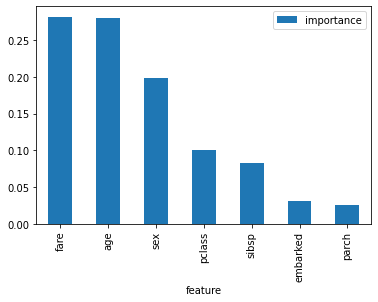

In [ ]:
#Visualize the importances
importances.plot.bar()

In [ ]:
#Print the prediction of the random forest classifier
pred = model[6].predict(X_test)
print(pred)

print()

#Print the actual Values
print(Y_test)

[1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [ ]:
'''
survived      int64


pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
'''

#My Survival
my_survival = [[3, 1, 21, 0, 0, 0, 1 ]]

#Scaling my Survival
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

#Print prediction of my survival using Random Forest Classifier
pred = model[6].predict(my_survival_scaled)

if pred == 0:
  print('Darrrn I died')
else:
  print('OOO I survived!')

Darrrn I died
